In [786]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [787]:
class Perceptron (object):
    def __init__(self , eta=0.001, n_iter=20, random_state=1): 
        self.eta = eta
        self.n_iter=n_iter
        self.random_state = random_state
        self.w_ = None
        self.errors_ = []
        self.accuracies_ = []

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        for _ in range(self.n_iter):
            errors = 0
            correct = 0  # Counter for correctly classified instances
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)  # count misclassified instances
                if update == 0:
                    correct += 1
            accuracy = correct / len(y)  # Calculate accuracy for current iteration
            self.accuracies_.append(accuracy)  # Store accuracy for each iteration
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w[0] not in dot product as x0=1
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [788]:
class Adaline(object):
    def __init__(self, eta=0.01, n_iter=20, random_state=1): 
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_ = None
        self.cost_ = []
        self.accuracies_ = []  # Track accuracy for each iteration

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = net_input
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Calculate accuracy for current iteration
            y_pred = self.predict(X)
            correct = np.sum(y_pred == y)
            accuracy = correct / len(y)
            self.accuracies_.append(accuracy)  # Store accuracy for each iteration
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [789]:
class SGD(object):
    def __init__(self, eta=0.001, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_ = None
        self.cost_ = []  # Track cost for each iteration
        self.accuracies_ = []  # Track accuracy for each iteration

    def fit(self, X, y):
        # Normalize input data
        X_normalized = self._normalize(X)
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X_normalized.shape[1])
        
        for _ in range(self.n_iter):
            X_normalized, y = self._shuffle(X_normalized, y)
            cost = []
            correct = 0
            for xi, target in zip(X_normalized, y):
                cost.append(self._update_weights(xi, target))
                if self.predict(xi) == target:
                    correct += 1
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            accuracy = correct / len(y)  # Calculate accuracy for current iteration
            self.accuracies_.append(accuracy)
        return self
    
    def _normalize(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return (X - mean) / std
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [790]:
# Load Iris dataset
iris_df = pd.read_csv('IrisDataset\\iris.data', header=None)
X_iris = iris_df.iloc[:, [0, 2]].values
y_iris = np.where(iris_df.iloc[:, 4].values == 'Iris-setosa', -1, 1)

In [791]:
# Load Dry Beans dataset
dry_beans_df = pd.read_excel('DryBeansDataset\\Dry_Bean_Dataset.xlsx', skiprows=1)
X_dry_beans = dry_beans_df.iloc[:, [0, 15]].values
y_dry_beans = np.where(dry_beans_df.iloc[:, 16].values == 'SEKER', -1, 1)

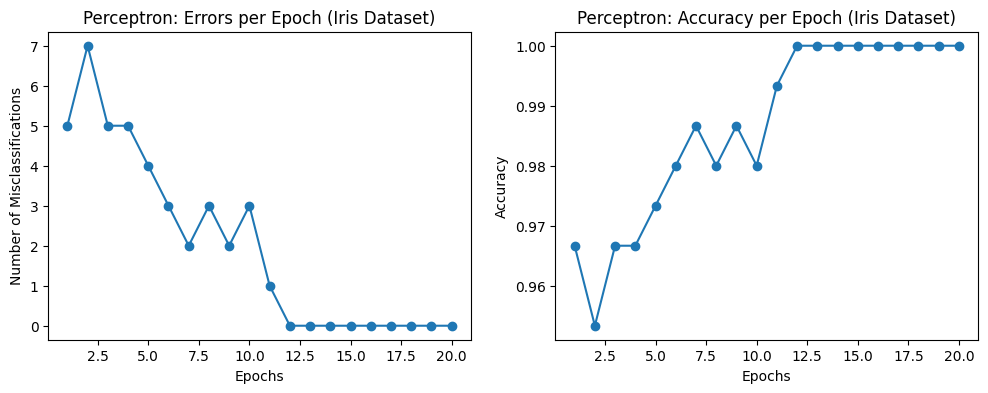

Errors:  [5, 7, 5, 5, 4, 3, 2, 3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracies:  [0.9666666666666667, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9866666666666667, 0.98, 0.9866666666666667, 0.98, 0.9933333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Time required: 0.04239940643310547 seconds


In [792]:
# Train and test Perceptron with Iris dataset
start_time = time.time()
perceptron_iris = Perceptron(eta=0.0001, n_iter=20)
perceptron_iris.fit(X_iris, y_iris)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot errors for Iris dataset
ax[0].plot(range(1, perceptron_iris.n_iter + 1), perceptron_iris.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number of Misclassifications')
ax[0].set_title('Perceptron: Errors per Epoch (Iris Dataset)')

# Plot accuracy for Iris dataset
ax[1].plot(range(1, perceptron_iris.n_iter + 1), perceptron_iris.accuracies_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Perceptron: Accuracy per Epoch (Iris Dataset)')
plt.show()

print("Errors: ", perceptron_iris.errors_)
print("Accuracies: ", perceptron_iris.accuracies_)
print("Time required:", required_time, 'seconds')

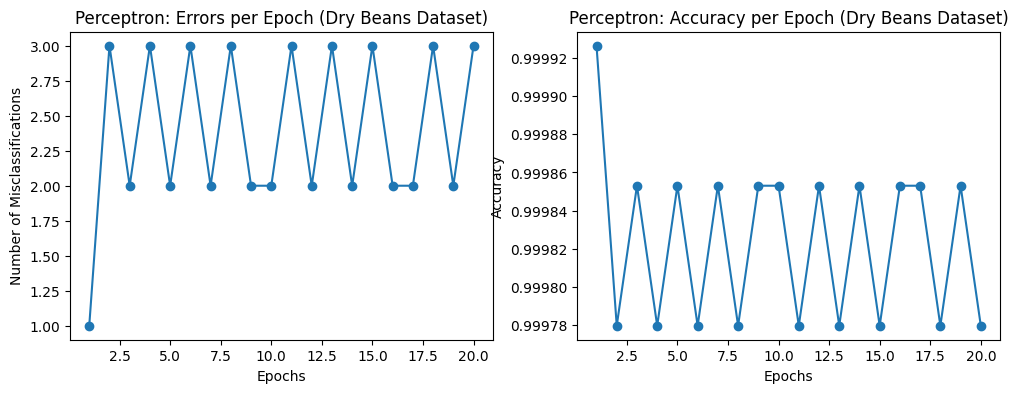

Errors:  [1, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3]
Accuracies:  [0.9999265246142542, 0.9997795738427627, 0.9998530492285085, 0.9997795738427627, 0.9998530492285085, 0.9997795738427627, 0.9998530492285085, 0.9997795738427627, 0.9998530492285085, 0.9998530492285085, 0.9997795738427627, 0.9998530492285085, 0.9997795738427627, 0.9998530492285085, 0.9997795738427627, 0.9998530492285085, 0.9998530492285085, 0.9997795738427627, 0.9998530492285085, 0.9997795738427627]
Time required: 5.655363321304321 seconds


In [793]:
# Train and test Perceptron with Dry Beans dataset
start_time = time.time()
perceptron_dry_beans = Perceptron(eta=0.0001, n_iter=20)
perceptron_dry_beans.fit(X_dry_beans, y_dry_beans)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot errors for Iris dataset
ax[0].plot(range(1, perceptron_dry_beans.n_iter + 1), perceptron_dry_beans.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number of Misclassifications')
ax[0].set_title('Perceptron: Errors per Epoch (Dry Beans Dataset)')

# Plot accuracy for Iris dataset
ax[1].plot(range(1, perceptron_dry_beans.n_iter + 1), perceptron_dry_beans.accuracies_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Perceptron: Accuracy per Epoch (Dry Beans Dataset)')
plt.show()

print("Errors: ", perceptron_dry_beans.errors_)
print("Accuracies: ", perceptron_dry_beans.accuracies_)
print("Time required:", required_time, 'seconds')

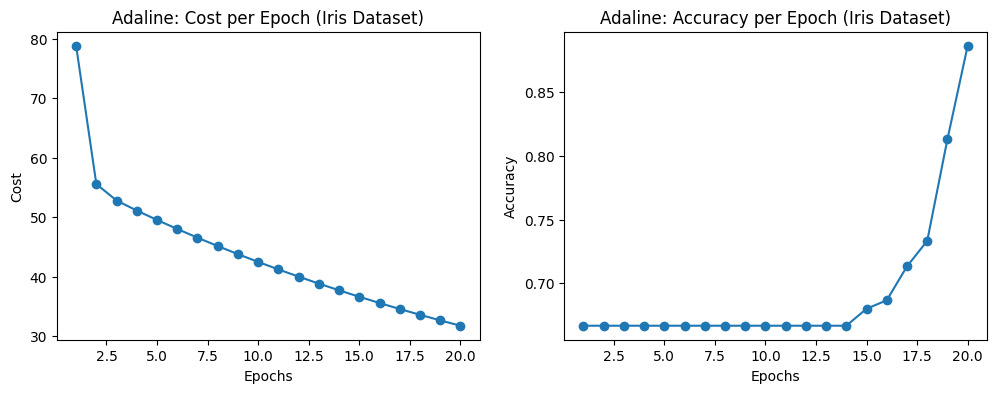

Cost:  [78.82268795860739, 55.568668257385696, 52.80583278465076, 51.11890982375015, 49.54185328440278, 48.02464551594885, 46.56282193192988, 45.15425169631026, 43.79698938057095, 42.48916577151406, 41.22898000927722, 40.01469684501209, 38.84464423841274, 37.717211054669505, 36.63084484590436, 35.58404971344913, 34.575384247993085, 33.60345954476268, 32.666937290999954, 31.764527923106165]
Accuracies:  [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.68, 0.6866666666666666, 0.7133333333333334, 0.7333333333333333, 0.8133333333333334, 0.8866666666666667]
Time required: 0.002001523971557617 seconds


In [794]:
# Train and test Adaline with Iris dataset
start_time = time.time()
adaline_iris = Adaline(eta=0.0001, n_iter=20)
adaline_iris.fit(X_iris, y_iris)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot errors for Iris dataset
ax[0].plot(range(1, adaline_iris.n_iter + 1), adaline_iris.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Cost')
ax[0].set_title('Adaline: Cost per Epoch (Iris Dataset)')

# Plot accuracy for Iris dataset
ax[1].plot(range(1, adaline_iris.n_iter + 1), adaline_iris.accuracies_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Adaline: Accuracy per Epoch (Iris Dataset)')
plt.show()

print("Cost: ", adaline_iris.cost_)
print("Accuracies: ", adaline_iris.accuracies_)
print("Time required:", required_time, 'seconds')

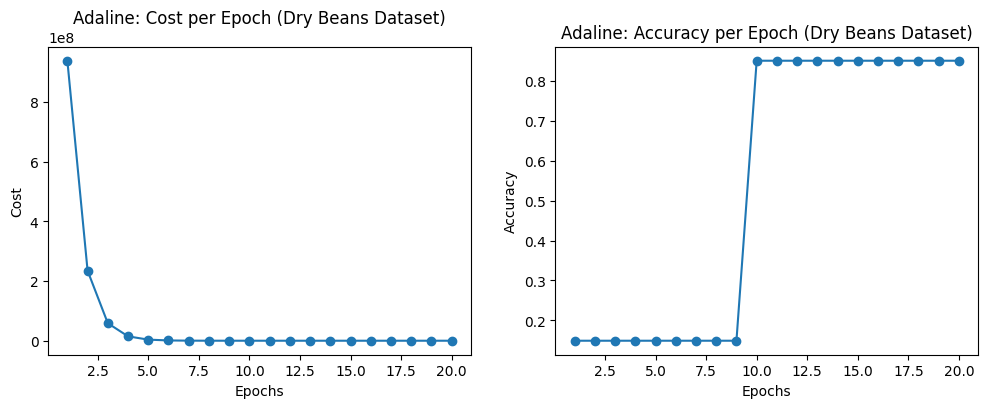

Cost:  [939103349.4268193, 234727283.03246692, 58671737.550357126, 14667466.857760817, 3668802.578912157, 919737.2265081804, 232621.0349246551, 60879.515457521455, 17953.515648200766, 7224.360197900045, 4542.657332759022, 3872.3780838038647, 3704.8448803751053, 3662.970729698104, 3652.504479051299, 3649.888487997452, 3649.23463308189, 3649.071205034328, 3649.0303569179764, 3649.0201470894417]
Accuracies:  [0.1488611315209405, 0.1488611315209405, 0.1488611315209405, 0.1488611315209405, 0.1488611315209405, 0.1488611315209405, 0.1488611315209405, 0.1488611315209405, 0.1488611315209405, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595]
Time required: 0.015767574310302734 seconds


In [795]:
# Train and test Adaline with Dry Beans dataset
start_time = time.time()
adaline_dry_beans = Adaline(eta=0.00000000000001, n_iter=20)
adaline_dry_beans.fit(X_dry_beans, y_dry_beans)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot errors for Dry Beans dataset
ax[0].plot(range(1, adaline_dry_beans.n_iter + 1), adaline_dry_beans.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Cost')
ax[0].set_title('Adaline: Cost per Epoch (Dry Beans Dataset)')

# Plot accuracy for Dry Beans dataset
ax[1].plot(range(1, adaline_dry_beans.n_iter + 1), adaline_dry_beans.accuracies_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Adaline: Accuracy per Epoch (Dry Beans Dataset)')
plt.show()

print("Cost: ", adaline_dry_beans.cost_)
print("Accuracies: ", adaline_dry_beans.accuracies_)
print("Time required:", required_time, 'seconds')

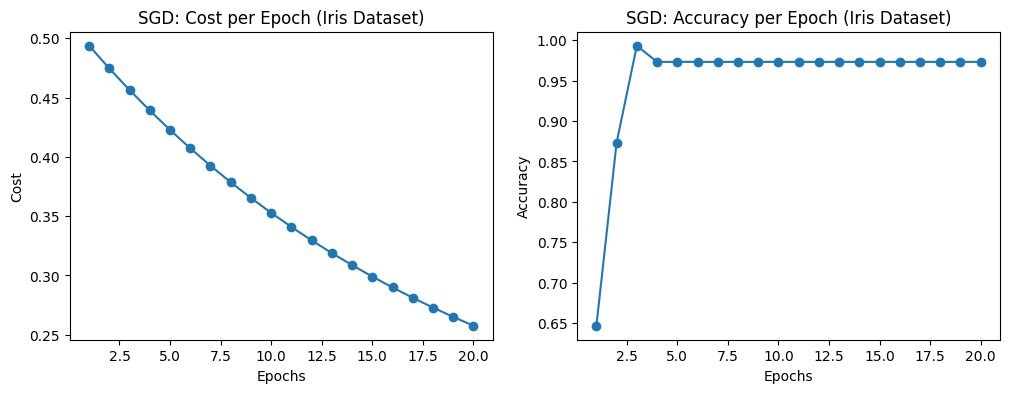

Cost:  [0.49371634136017434, 0.4745266298401186, 0.4563436655130897, 0.43910003463151376, 0.42274632728579514, 0.4072430519078514, 0.39254214114857255, 0.37860079639779465, 0.365373714585668, 0.35282514911065693, 0.34091832739434685, 0.3296222310043244, 0.3189030669866886, 0.3087270628599362, 0.29906224495682804, 0.2898926955163488, 0.28118790008370137, 0.2729172829923027, 0.26506632853928014, 0.25761150385388754]
Accuracies:  [0.6466666666666666, 0.8733333333333333, 0.9933333333333333, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334]
Time required: 0.051798343658447266 seconds


In [796]:
# Train and test SGD with Iris dataset
start_time = time.time()
sgd_iris = SGD(eta=0.0001, n_iter=20)
sgd_iris.fit(X_iris, y_iris)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot errors for Iris dataset
ax[0].plot(range(1, sgd_iris.n_iter + 1), sgd_iris.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Cost')
ax[0].set_title('SGD: Cost per Epoch (Iris Dataset)')

# Plot accuracy for Iris dataset
ax[1].plot(range(1, sgd_iris.n_iter + 1), sgd_iris.accuracies_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('SGD: Accuracy per Epoch (Iris Dataset)')
plt.show()

print("Cost: ", sgd_iris.cost_)
print("Accuracies: ", sgd_iris.accuracies_)
print("Time required:", required_time, 'seconds')

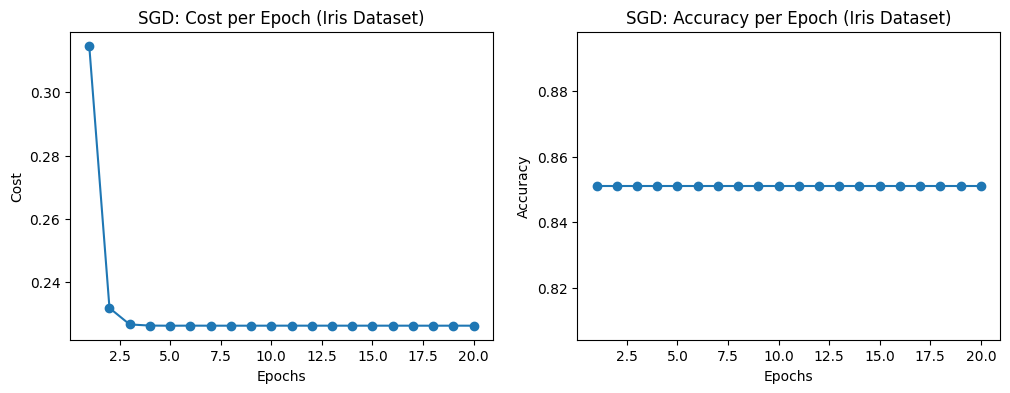

Cost:  [0.3147282585820584, 0.23182063956354024, 0.22662279510926725, 0.22626447392256152, 0.22621752770479697, 0.2262417113548017, 0.22622787856856838, 0.22622749935965217, 0.22622769636821108, 0.22623194090799617, 0.2262358805056149, 0.22623153981984476, 0.2262342604994566, 0.22622887133675443, 0.22623345148489743, 0.22623122912947788, 0.22623087521009486, 0.2262249706279576, 0.2262319029229755, 0.2262288735236038]
Accuracies:  [0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595, 0.8511388684790595]
Time required: 6.142278432846069 seconds


In [797]:
# Train and test SGD with Dry Beans dataset
start_time = time.time()
sgd_dry_beans = SGD(eta=0.0001, n_iter=20)
sgd_dry_beans.fit(X_dry_beans, y_dry_beans)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot errors for Iris dataset
ax[0].plot(range(1, sgd_dry_beans.n_iter + 1), sgd_dry_beans.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Cost')
ax[0].set_title('SGD: Cost per Epoch (Iris Dataset)')

# Plot accuracy for Iris dataset
ax[1].plot(range(1, sgd_dry_beans.n_iter + 1), sgd_dry_beans.accuracies_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('SGD: Accuracy per Epoch (Iris Dataset)')
plt.show()

print("Cost: ", sgd_dry_beans.cost_)
print("Accuracies: ", sgd_dry_beans.accuracies_)
print("Time required:", required_time, 'seconds')

In [798]:
class OvRClassifierSGD:
    def __init__(self, binary_classifier, random_state=1):
        self.binary_classifier = binary_classifier
        self.random_state = random_state
        self.classifiers = {}
        self.errors_ = {}
        self.accuracies_ = {}

    def fit(self, X, y):
        unique_classes = np.unique(y)
        for cls in unique_classes:
            binary_y = np.where(y == cls, 1, -1)
            classifier = self.binary_classifier(random_state=self.random_state)
            classifier.fit(X, binary_y)
            self.classifiers[cls] = classifier
            self.errors_[cls] = classifier.cost_
            self.accuracies_[cls] = classifier.accuracies_

    def predict(self, X):
        scores = {}
        for cls, classifier in self.classifiers.items():
            scores[cls] = classifier.predict(X)

        predictions = []
        for i in range(X.shape[0]):
            instance_scores = [scores[cls][i] for cls in scores]
            predicted_class = max(scores, key=lambda cls: scores[cls][i])
            predictions.append(predicted_class)
        return np.array(predictions)

In [799]:
# Load Iris dataset
iris_df = pd.read_csv('IrisDataset\\iris.data', header=None)
X_iris = iris_df.iloc[:, [0, 3]].values
iris_class_mapping = {'Iris-setosa':1, 'Iris-versicolor':2,'Iris-virginica':3}
iris_y_encoded = iris_df.iloc[:, 4].map(iris_class_mapping)
y_iris_ovr = np.array(iris_y_encoded)


In [800]:
# Load Dry Beans dataset
dry_beans_df = pd.read_excel('DryBeansDataset\\Dry_Bean_Dataset.xlsx', skiprows=1)
X_dry_beans = dry_beans_df.iloc[:, [0, 15]].values
class_mapping = {'SEKER':1, 'BARBUNYA':2, 'BOMBAY':3, 'CALI':4, 'HOROZ':5, 'SIRA':6, 'DERMASON':7}
y_encoded = dry_beans_df.iloc[:, 16].map(class_mapping)
y_dry_beans_ovr = np.array(y_encoded)

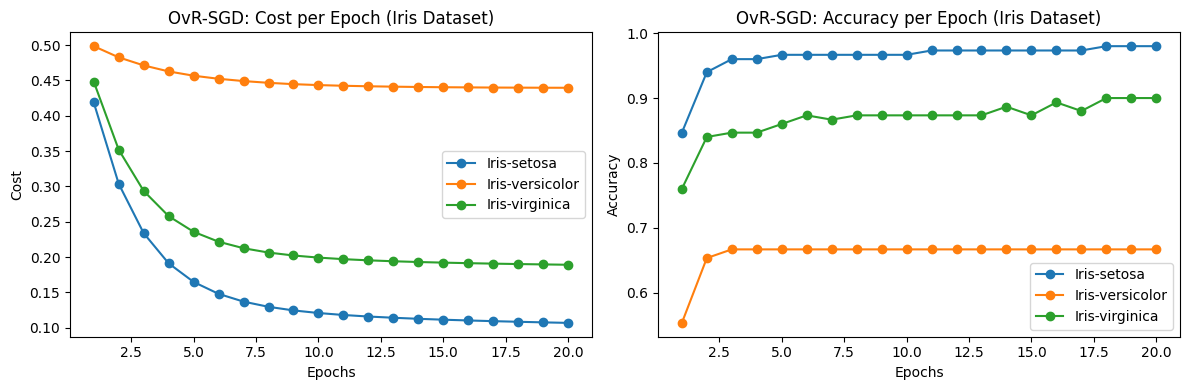

Cost:  {1: [0.4187847287065001, 0.30368551397747356, 0.23384763892295696, 0.19116002622576317, 0.16483763523535233, 0.14799556363700891, 0.13698908639136426, 0.1296564084548041, 0.12456286271895356, 0.1208815103136864, 0.11809217352236163, 0.11591633275668177, 0.11418067944431742, 0.11268821810492238, 0.11143418790838318, 0.11034162317626411, 0.10936533240930302, 0.10848386644596493, 0.10764722498178822, 0.10691661072643094], 2: [0.4984653027843959, 0.4826359603059849, 0.47124359034903507, 0.4627221187878472, 0.4566639895875751, 0.45232021183384724, 0.4490847068055183, 0.44661368141941676, 0.444704490303005, 0.44340398089567146, 0.4424357966407455, 0.4417197181885053, 0.441171369077185, 0.44070865902555456, 0.44036040942498184, 0.44013903047958564, 0.43990606458110154, 0.43978680392068575, 0.43965859276046076, 0.43959360313514895], 3: [0.44825580243221624, 0.3519321346924214, 0.2936262467194247, 0.2579377255127195, 0.23577567277684225, 0.22176150235905767, 0.21255068558693063, 0.206432

In [801]:
# Train and test OvRClassifierSGD with Iris dataset
map = {1:'Iris-setosa', 2:'Iris-versicolor',3:'Iris-virginica'}
start_time = time.time()
ovr_sgd_iris = OvRClassifierSGD(SGD)
ovr_sgd_iris.fit(X_iris, y_iris_ovr)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot errors for Iris dataset
for cls, errors in ovr_sgd_iris.errors_.items():
    ax[0].plot(range(1, len(errors) + 1), errors, marker='o', label=map[cls])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Cost')
    ax[0].set_title('OvR-SGD: Cost per Epoch (Iris Dataset)')
    ax[0].legend()

# Plot accuracy for Iris dataset
for cls, accuracies in ovr_sgd_iris.accuracies_.items():
    ax[1].plot(range(1, len(accuracies) + 1), accuracies, marker='o', label=map[cls])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('OvR-SGD: Accuracy per Epoch (Iris Dataset)')
    ax[1].legend()

plt.tight_layout()
plt.show()

print("Cost: ", ovr_sgd_iris.errors_)
print("Accuracies: ", ovr_sgd_iris.accuracies_)
print("Time required:", required_time, 'seconds')

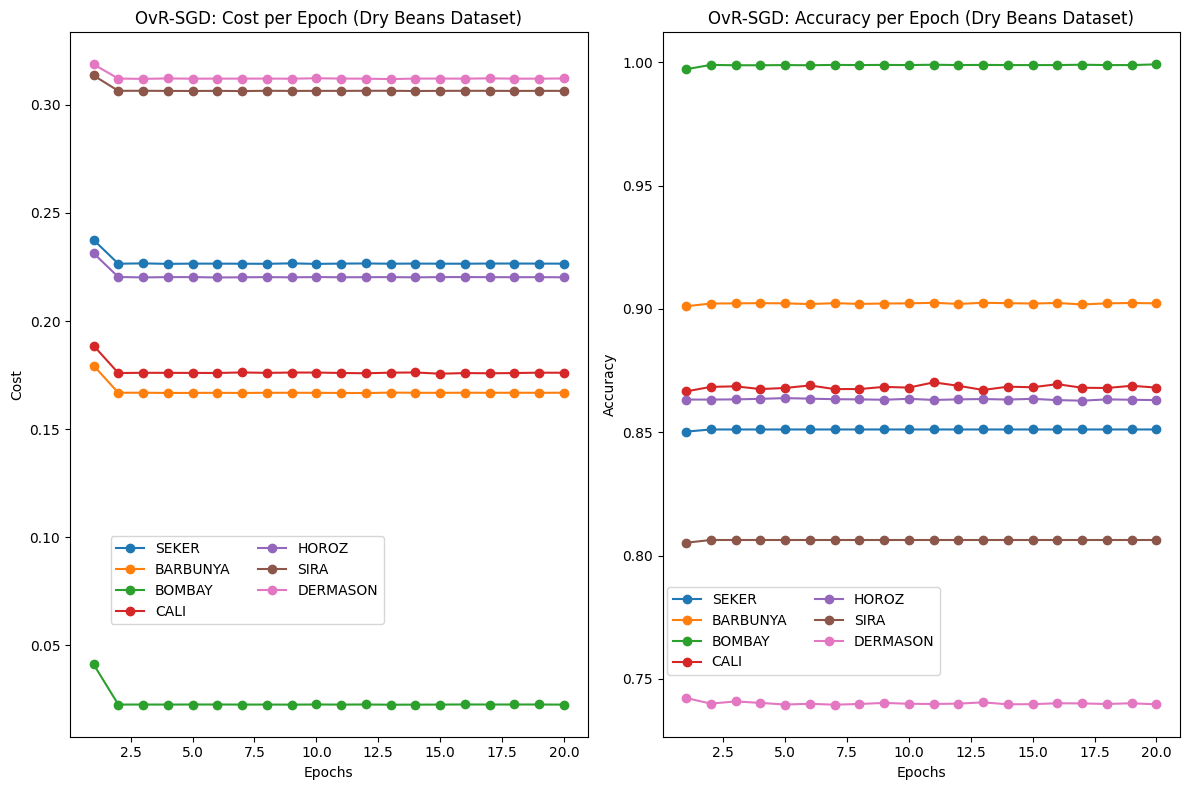

Time required: 26.949723958969116 seconds


In [802]:
# Train and test OvRClassifierSGD with Dry Beans dataset
map = {1:'SEKER', 2:'BARBUNYA', 3:'BOMBAY', 4:'CALI', 5:'HOROZ', 6:'SIRA', 7:'DERMASON'}
start_time = time.time()
ovr_sgd_dry_beans = OvRClassifierSGD(SGD)
ovr_sgd_dry_beans.fit(X_dry_beans, y_dry_beans_ovr)
end_time = time.time()
required_time = end_time - start_time

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot errors for Dry Beans dataset
for cls, errors in ovr_sgd_dry_beans.errors_.items():
    ax[0].plot(range(1, len(errors) + 1), errors, marker='o', label=map[cls])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Cost')
    ax[0].set_title('OvR-SGD: Cost per Epoch (Dry Beans Dataset)')
    ax[0].legend(bbox_to_anchor=(0.065, 0.15), ncol=2)

# Plot accuracy for Dry Beans dataset
for cls, accuracies in ovr_sgd_dry_beans.accuracies_.items():
    ax[1].plot(range(1, len(accuracies) + 1), accuracies, marker='o', label=map[cls])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('OvR-SGD: Accuracy per Epoch (Dry Beans Dataset)')
    ax[1].legend(bbox_to_anchor=(0.55, 0.15), ncol=2)

plt.tight_layout()
plt.show()

print("Time required:", required_time, 'seconds')
